In [2]:
import os
import re
import fnmatch
import string
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.DataFrame(columns=['Name', 'Publisher', 'GameSpotScore', 'Review', 'Console', 'Genre'])
i=0
for dirpath, dirs, files in os.walk('dataset/reviews'):   
    for file in fnmatch.filter(files, '*.txt'):
        with open(os.path.join(dirpath, file), 'r') as ip:
            data=ip.read()
            name=re.findall(r':::Game Name:::(.*?)-----', data, re.DOTALL)[0].strip()
            review=re.findall(r':::Review:::(.*?)-----',data, re.DOTALL)[0].strip()
            scores=re.findall(r':::Scores:::(.*?)-----',data, re.DOTALL)[0]
            addition=re.findall(r':::Addition:::(.*?)-----',data, re.DOTALL)[0]
            gsScore=re.findall(r'GameSpot Score:(.*?)\n', scores)[0]
            review = review.lower()
            tVar = str.maketrans('', '', string.punctuation)
            review = review.translate(tVar)
            words=review.split()
            try:
                pub=re.findall(r'Publisher:(.*?)\n', addition)[0]
            except:
                pub=''
            try:
                genre=re.findall(r'Genre:(.*?)\n', addition)[0]
            except:
                genre=''
            console=dirpath.strip('dataset/reviews/')
            df.loc[i]=[name, pub, gsScore, review, console, genre]
            i+=1

In [4]:
df['GameSpotScore']=pd.to_numeric(df['GameSpotScore'])

print('Number of documents', len(df))
print('Mean Score:', df['GameSpotScore'].mean())


Number of documents 8278
Mean Score: 6.76023194008


Total Genres 137


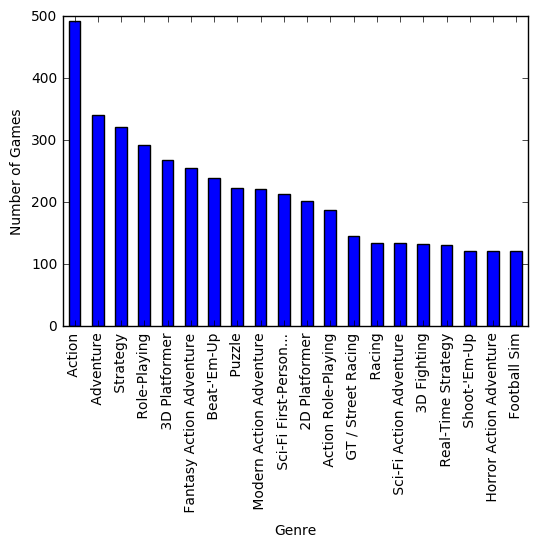

In [5]:
dfGenres=df[['Name', 'Genre']].groupby(['Genre']).count()
print('Total Genres', len(dfGenres))
dfGenres=dfGenres.sort_values(['Name'], ascending=False).head(20)

ax = dfGenres.plot(kind='bar')
ax.legend_.remove()
ax.set_ylabel('Number of Games')

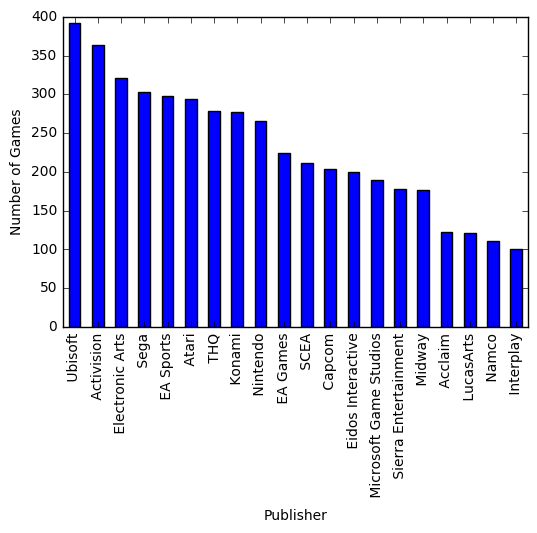

In [6]:
dfPublishers=df[['Name', 'Publisher']].groupby(['Publisher']).count()
dfPublishers=dfPublishers.sort_values(['Name'], ascending=False).head(20)

ax = dfPublishers.plot(kind='bar')
ax.legend_.remove()
ax.set_ylabel('Number of Games')

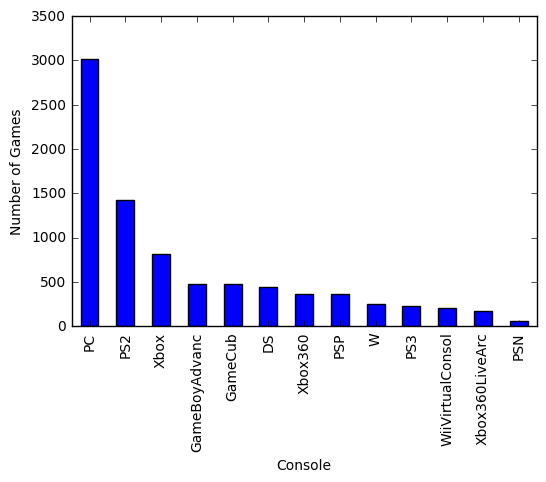

In [81]:
dfConsole=df[['Name', 'Console']].groupby(['Console']).count()
dfConsole=dfConsole.sort_values(['Name'], ascending=False).head(20)

ax = dfConsole.plot(kind='bar')
ax.legend_.remove()
ax.set_ylabel('Number of Games')